In [1]:
import pandas as pd
import json 
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = pd.read_json('round-1to2-by-provinces.json')
f1 = pd.read_json('timeline-cases-by-provinces.json')

In [3]:
f

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN
...,...,...,...,...,...
30337,2021-03-31,เพชรบูรณ์,0,4,NaN
30338,2021-03-31,เลย,0,12,NaN
30339,2021-03-31,แพร่,0,1,NaN
30340,2021-03-31,แม่ฮ่องสอน,0,5,NaN


In [4]:
f1

,txn_date,province,new_case,total_case,update_date
0,2021-04-01,กระบี่,0,27,2021-08-19 07:39:31
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
2,2021-04-01,กาญจนบุรี,0,16,2021-08-19 07:39:31
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-19 07:39:31
4,2021-04-01,กำแพงเพชร,0,2,2021-08-19 07:39:31
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


In [5]:
f_bkk = f[f['province'] == "กรุงเทพมหานคร"]
f1_bkk = f1[f1['province'] == "กรุงเทพมหานคร"]

In [6]:
#Thailand
Thai_case = f.append(f1)
Thai_case

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


In [7]:
Thai_case1 = Thai_case.groupby(['txn_date']).sum()
Thai_case1

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6
...,...,...
2021-08-16,21157,928314
2021-08-17,20128,948442
2021-08-18,20515,968957


In [8]:
#BKK
Bkk_case = f_bkk.append(f1_bkk)
Bkk_case

,txn_date,province,new_case,total_case,update_date
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
79,2020-01-17,กรุงเทพมหานคร,1,2,NaN
157,2020-01-22,กรุงเทพมหานคร,1,3,NaN
235,2020-01-24,กรุงเทพมหานคร,0,3,NaN
313,2020-01-25,กรุงเทพมหานคร,1,4,NaN
...,...,...,...,...,...
10687,2021-08-16,กรุงเทพมหานคร,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,กรุงเทพมหานคร,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,กรุงเทพมหานคร,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,กรุงเทพมหานคร,4410,258105,2021-08-19 07:39:31


In [9]:
Bkk_case1 = Bkk_case.groupby(['txn_date']).sum()
Bkk_case1

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,1,3
2020-01-24,0,3
2020-01-25,1,4
...,...,...
2021-08-16,4337,245126
2021-08-17,4404,249530
2021-08-18,4165,253695


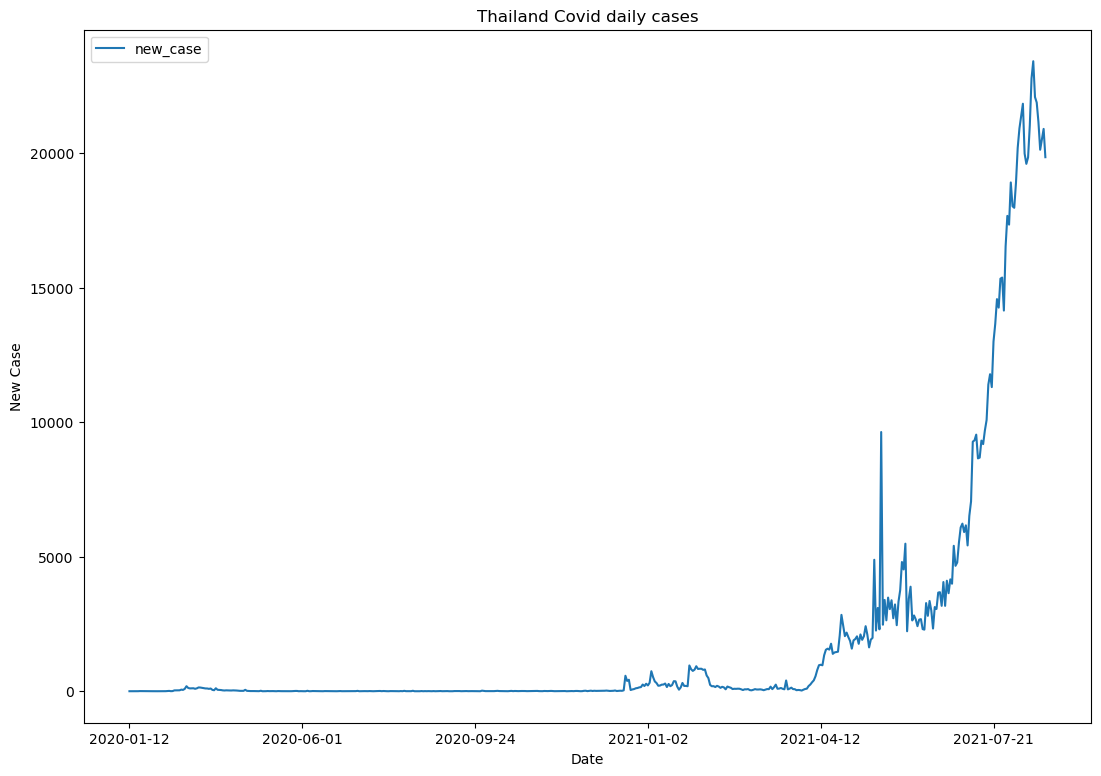

In [10]:
Thai_case1.plot(y='new_case',
                figsize = (13,9),
                xlabel="Date",
                ylabel="New Case",
                title="Thailand Covid daily cases")
plt.show()

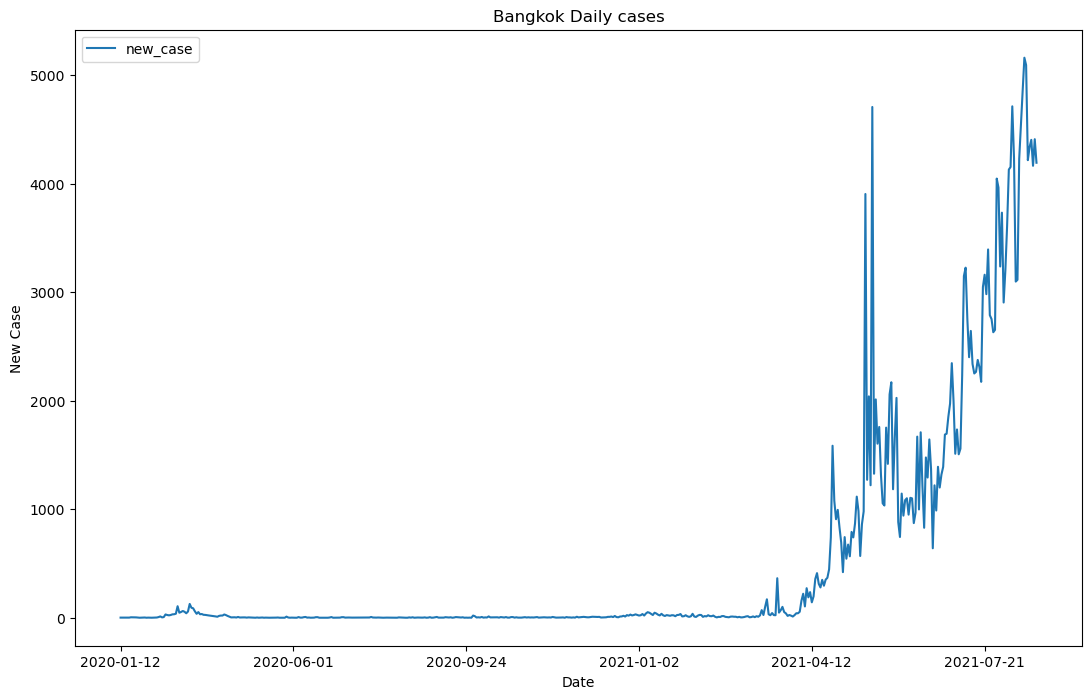

In [11]:
Bkk_case1.plot(y='new_case',
                figsize = (13,8),
                xlabel="Date",
                ylabel="New Case",
                title="Bangkok Daily cases")
plt.show()

In [12]:
#Thailaind case start April 2021
Thai_case_2021 = Thai_case.groupby(['txn_date']).sum()
Thai_case_2021 = Thai_case[Thai_case['txn_date'] > '2021-04-01']
Thai_case_2021

,txn_date,province,new_case,total_case,update_date
78,2021-04-02,กระบี่,0,27,2021-08-19 07:39:31
79,2021-04-02,กรุงเทพมหานคร,24,4879,2021-08-19 07:39:31
80,2021-04-02,กาญจนบุรี,0,16,2021-08-19 07:39:31
81,2021-04-02,กาฬสินธุ์,0,4,2021-08-19 07:39:31
82,2021-04-02,กำแพงเพชร,0,2,2021-08-19 07:39:31
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


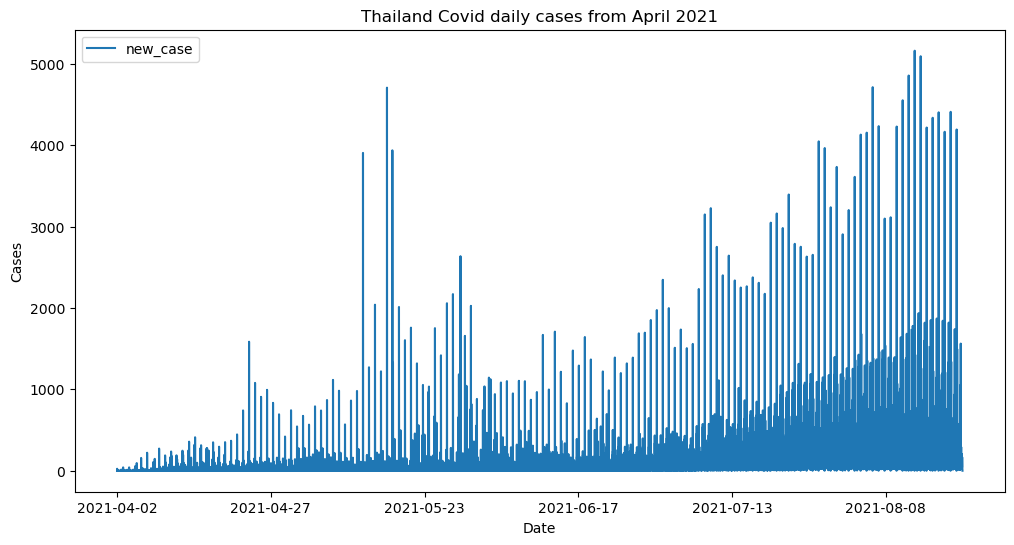

In [13]:
Thai_case_2021.plot(x='txn_date',y='new_case',figsize = (12,6),
                    title = 'Thailand Covid daily cases from April 2021',
                    xlabel = 'Date',
                    ylabel = 'Cases')
plt.show()

In [14]:
#Bkk case start April 2021
Bkk_case_2021 = Bkk_case.groupby(['txn_date']).sum()
Bkk_case_2021 = Bkk_case[Bkk_case['txn_date'] > '2021-04-01']
Bkk_case_2021

,txn_date,province,new_case,total_case,update_date
79,2021-04-02,กรุงเทพมหานคร,24,4879,2021-08-19 07:39:31
157,2021-04-03,กรุงเทพมหานคร,41,4920,2021-08-19 07:39:31
235,2021-04-04,กรุงเทพมหานคร,41,4961,2021-08-19 07:39:31
313,2021-04-05,กรุงเทพมหานคร,55,5016,2021-08-19 07:39:31
391,2021-04-06,กรุงเทพมหานคร,157,5173,2021-08-19 07:39:31
...,...,...,...,...,...
10687,2021-08-16,กรุงเทพมหานคร,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,กรุงเทพมหานคร,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,กรุงเทพมหานคร,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,กรุงเทพมหานคร,4410,258105,2021-08-19 07:39:31


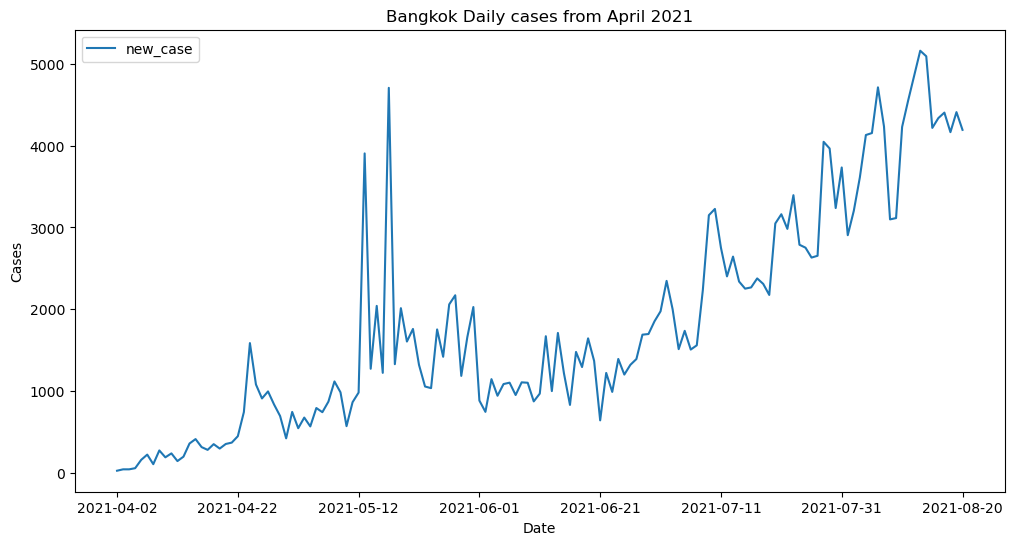

In [15]:
Bkk_case_2021.plot(x='txn_date',y='new_case',figsize = (12,6),
                    title = 'Bangkok Daily cases from April 2021',
                    xlabel = 'Date',
                    ylabel = 'Cases')
plt.show()